## Bike Rental Data Exploration

#### By Abdullateef Al-Majed

## Preliminary Wrangling

The data consists of information regarding 3,757,777 bike rental trips in the city of Washington DC.
Each row includes details about a single trip. Such as duration, start date, end date, start station, end station and membership type of the renter. The dataset covers the bike rental trips for the period from 01-01-2017 to 31-12-2017
The dataset can be found in the following link: https://s3.amazonaws.com/capitalbikeshare-data/index.html

Also, we introduce another dataset which was collected by scrapping the following website : https://www.wunderground.com/history/daily/us/dc/washington/KDCA
The gathered information is about the weather conditions on all days from 01-01-2017 to 31-12-2017 on an hourly basis. It includes Temperature, Dew Point, Humidity, Wind, Wind Speed, Wind Gust, Pressure and Preciption. These could be used to correlate to bike rentals from first dataset.






In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#### Reading the data of bike rentals from four different files and combining them into one dataframe

In [2]:
df1 = pd.read_csv("2017Q1-capitalbikeshare-tripdata.csv",parse_dates=['Start date','End date'])
df2 = pd.read_csv("2017Q2-capitalbikeshare-tripdata.csv",parse_dates=['Start date','End date'])
df3 = pd.read_csv("2017Q3-capitalbikeshare-tripdata.csv",parse_dates=['Start date','End date'])
df4 = pd.read_csv("2017Q4-capitalbikeshare-tripdata.csv",parse_dates=['Start date','End date'])
# to have data of the full year , using concat as union
df = pd.concat([df1, df2, df3, df4]).reset_index(drop = True) 

#### Reading the data of weather conditions that were web scrapped earlier

In [3]:
df_weather = pd.read_excel("WeatherDF_FINAL.xlsx",parse_dates=['DateTime'],index_col=0)

In [4]:
df_weather.head()

,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition,DateTime
0,2017-01-01,12:52 AM,46,22,39,SW,9,0,29.97,0.0,Mostly Cloudy,2017-01-01 00:52:00
1,2017-01-01,1:52 AM,44,22,42,SSW,9,0,29.98,0.0,Partly Cloudy,2017-01-01 01:52:00
2,2017-01-01,2:52 AM,43,23,45,SSW,13,0,30.00,0.0,Partly Cloudy,2017-01-01 02:52:00
3,2017-01-01,3:52 AM,41,23,49,SW,5,0,30.02,0.0,Partly Cloudy,2017-01-01 03:52:00
4,2017-01-01,4:52 AM,40,23,51,SSW,5,0,30.04,0.0,Partly Cloudy,2017-01-01 04:52:00


#### Dropping null values from rows and renaming the columns appropriately

In [5]:
# to drop the null values row if any 
df = df.dropna() 

In [6]:
df = df.rename(columns = {'Start date': 'Start_date', 'End date': 'End_date','Start station number':'Start_station_number'}, inplace = False)
df = df.rename(columns = {'Start station': 'Start_station', 'End station number': 'End_station_number','End station':'End_station'}, inplace = False)
df = df.rename(columns = {'Bike number': 'Bike_number', 'Member type': 'Member_type'}, inplace = False)

#### Displaying the summary of the dataset columns 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3757777 entries, 0 to 3757776
Data columns (total 9 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Duration              int64         
 1   Start_date            datetime64[ns]
 2   End_date              datetime64[ns]
 3   Start_station_number  int64         
 4   Start_station         object        
 5   End_station_number    int64         
 6   End_station           object        
 7   Bike_number           object        
 8   Member_type           object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 286.7+ MB


In [6]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(3757777, 9)
Duration                         int64
Start_date              datetime64[ns]
End_date                datetime64[ns]
Start_station_number             int64
Start_station                   object
End_station_number               int64
End_station                     object
Bike_number                     object
Member_type                     object
dtype: object
   Duration          Start_date            End_date  Start_station_number  \
0       221 2017-01-01 00:00:41 2017-01-01 00:04:23                 31634   
1      1676 2017-01-01 00:06:53 2017-01-01 00:34:49                 31258   
2      1356 2017-01-01 00:07:10 2017-01-01 00:29:47                 31289   
3      1327 2017-01-01 00:07:22 2017-01-01 00:29:30                 31289   
4      1636 2017-01-01 00:07:36 2017-01-01 00:34:52                 31258   
5      1603 2017-01-01 00:08:11 2017-01-01 00:34:55                 31258   
6       473 2017-01-01 00:08:36 2017-01-01 00:16:29                 31611   
7     

#### Showing descriptive summary of the numeric columns

In [7]:
# descriptive statistics for numeric variables
df.describe()

,Duration,Start_station_number,End_station_number
count,3.757777e+06,3.757777e+06,3.757777e+06
mean,1.153367e+03,3.132043e+04,3.132113e+04
std,2.121272e+03,2.206445e+02,2.181511e+02
min,6.000000e+01,3.100000e+04,3.100000e+04
25%,4.100000e+02,3.120500e+04,3.121100e+04
50%,7.100000e+02,3.125500e+04,3.125400e+04
75%,1.226000e+03,3.150200e+04,3.150000e+04
max,8.639400e+04,3.222500e+04,3.222500e+04


### What is the structure of your dataset?

There are 3,757,777 bike trip details in the dataset with 9 features (Duration, Start_date, End_date, start_station_number, Start_station, End_station_number, End_station, Bike_number and Member_type).
Only three variables are numeric in nature. Two variables are datetime objects and the rest are strings. One of the string variables is Member_type which is a categorical variable that consists of only 2 categories. Its eaither Causaul or Member.

Also, we have another dataset of the weather conditions during the whole period of bike rentals in the first dataset

### What is/are the main feature(s) of interest in your dataset?

From the bike rentals dataset, I'm most interested in figuring out what features are most associated with an increase in bike rentals duration. And how the number of rentals is affected by what time of the day it was rented in.

Moreover, in the weather condition dataset, I am intrested in knowing the correlation between high tempratures and the duration of bike rental.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I'm most interested in the Member_type and duration variables and how they affect bike trips in different seasons of the year.

I expect that there will be a positive correlation between bike rental aounts and early mornings. This is due to the fact that many people would use the bikes on their way to work. Also, I think that people with no memberships(member_type) would often rent the bikes in evenings or in holidays.

Also, I think the temprature will affect the duration strongly.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: duration.

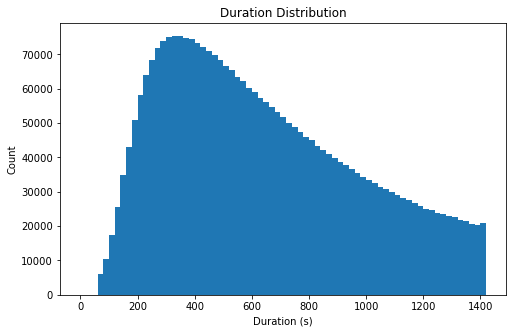

In [38]:
# start with a standard-scaled plot
binsize = 20
bins = np.arange(0, df['Duration'].median()*2 +binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'Duration', bins = bins)
plt.xlabel('Duration (s)')
plt.ylabel('Count')
plt.title('Duration Distribution')
plt.show()

As we see above, distribution of Duration has a peak just below 400 seconds, which is about 6 minutes.  Majority of trips fall within 1400 seconds which is just less than half an hour.


<b>Next up, the first predictor variable of interest: Member_type.</b>


#### We note that the majority of our records are for trips taken by Members(not casuals)

Member    2775979
Casual     981798
Name: Member_type, dtype: int64


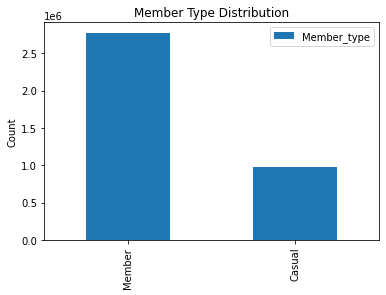

In [39]:
pd.DataFrame(df.Member_type.value_counts()).plot.bar(ylabel = 'Count',title = 'Member Type Distribution');

print(df.Member_type.value_counts());

#### Here, we check the End_station variable to see if there are more frequent destinations

We find that station number 31623 is the one that most trips ended at, with more than 73,500 trips ended there. This station is Columbus Circle / Union Station .

31623    73569
31258    66489
31247    61135
31200    50802
31201    46074
         ...  
32072       16
32202       16
31815       13
31715       13
31819        4
Name: End_station_number, Length: 487, dtype: int64


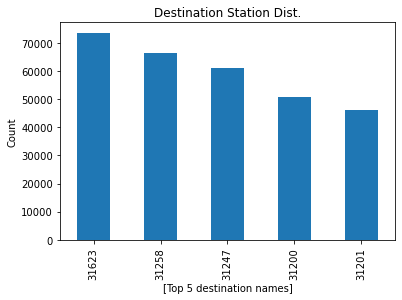

In [40]:
df.End_station_number.value_counts()[:5].plot.bar(xlabel = ['Top 5 destination names'],ylabel = 'Count',title = 'Destination Station Dist.');
print(df.End_station_number.value_counts());

In [44]:
df[df.End_station_number == 31623]['End_station'][:1]

33    Columbus Circle / Union Station
Name: End_station, dtype: object

#### Wind Speed Dist.

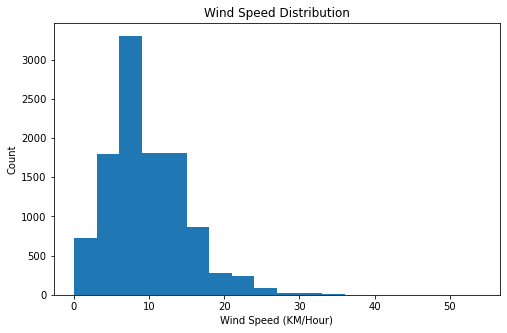

In [77]:
# start with a standard-scaled plot
binsize = 3
bins = np.arange(0, full_df['Wind Speed'].max() +binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = full_df, x = 'Wind Speed', bins = bins)
plt.xlabel('Wind Speed (KM/Hour)')
plt.ylabel('Count')
plt.title('Wind Speed Distribution')
plt.show()

#### Temperature Dist.

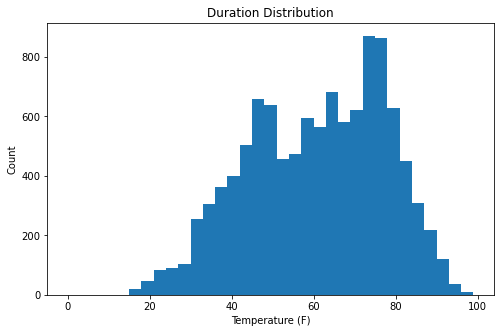

In [76]:
# start with a standard-scaled plot
binsize = 3
bins = np.arange(0, full_df['Temperature'].max() +binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = full_df, x = 'Temperature', bins = bins)
plt.xlabel('Temperature (F)')
plt.ylabel('Count')
plt.title('Duration Distribution')
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

In general, the distribution of Duration has a peak just below 400 seconds, which is about 6 minutes. Also, Majority of trips fall within 1400 seconds which is just less than half an hour.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I gathered the data from four different files and combined them into one. Then I renamed the columns appropriately. Also, one thing to note about the member_type variable is that the trips performed by members are double the amount of trips by casual users. Moreover, Columbus Circle / Union Station appeared to be the most desired trip destination with highest number of trips ending there.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

#### We try to find if there are differences between the durarion of trips between members and casual customers

In [7]:
mem = df[df.Member_type == 'Member']
cas = df[df.Member_type == 'Casual']

#### starting with a plot for the durations of trips for Members only


We observe that the peak is approximately at 300 seconds which is around 5 minutes.

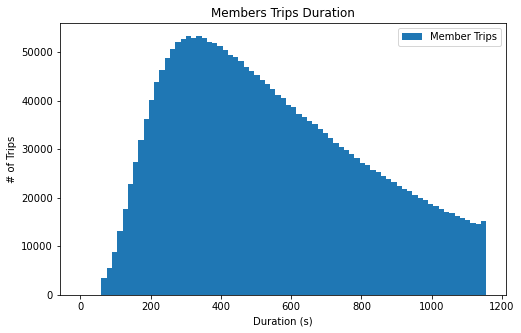

In [8]:
binsize = 15
bins = np.arange(0, mem['Duration'].median()*2 +binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = mem, x = 'Duration', bins = bins)
plt.xlabel('Duration (s)')
plt.ylabel('# of Trips')
plt.legend(['Member Trips'])
plt.title('Members Trips Duration')
plt.show()

#### Plot for the durations of trips for Casual(non-members) only

We observe that the peak is wider in this plot. Its around 1,000 seconds which is around 15 minutes. That is 3 times as member plot's peak seen earlier.

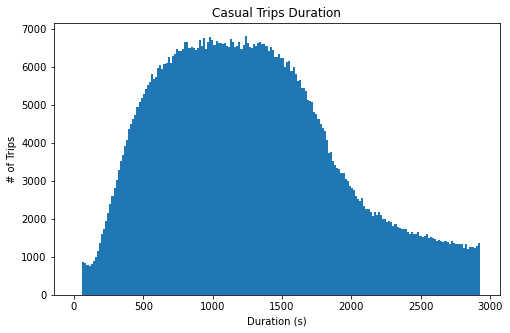

In [9]:
#  plot for the durations of trips for Casual(non-members) only

binsize = 15
bins = np.arange(0, cas['Duration'].median()*2 +binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = cas, x = 'Duration', bins = bins)
plt.xlabel('Duration (s)')
plt.ylabel('# of Trips')
plt.title('Casual Trips Duration')
plt.show()

#### In the following we try to plot the box plot of the duration of the trips. We do it to show the difference between members and casuals

In [10]:
from scipy import stats
df2=df[{'Duration','Member_type'}]
df2.insert(0, 'ID', range(1,1+len(df2)))
df3=df2.pivot(index='ID',columns='Member_type',values='Duration')
Casual=df3['Casual'].to_frame()
Member=df3['Member'].to_frame()
Casual2=Casual.dropna()[(np.abs(stats.zscore(Casual.dropna()))<3).all(axis=1)]
Member2=Member.dropna()[(np.abs(stats.zscore(Member.dropna()))<3).all(axis=1)]


Casual_min=(Casual2['Casual']/60).to_frame()
Member_min=(Member2['Member']/60).to_frame()

Casual_hr=(Casual2['Casual']/(60*60)).to_frame()
Member_hr=(Member2['Member']/(60*60)).to_frame()

df_sec=pd.concat([Casual2,Member2])
df_min=pd.concat([Casual_min,Member_min])
df_hr=pd.concat([Casual_hr,Member_hr])


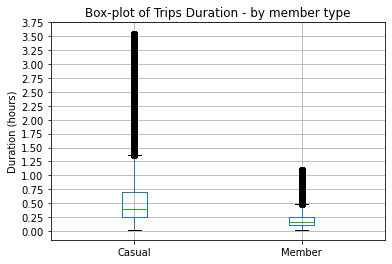

In [11]:
plt.ylabel('Duration (hours)');
plt.title('Box-plot of Trips Duration - by member type');

df_hr.boxplot(figsize=(10,7)).set_yticks(np.arange(0,4,0.25));

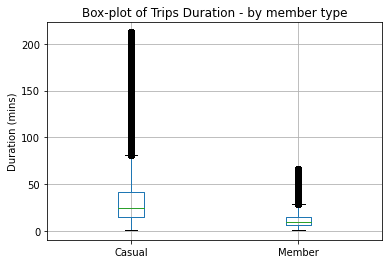

In [12]:
plt.ylabel('Duration (mins)');
plt.title('Box-plot of Trips Duration - by member type');

df_min.boxplot(figsize=(10,7));

#### Interpretation 




From the box plot, it can be easily seen that Casual Customers use the bike for longer duration. 
The median of Casual type is almost 23 minutes while the Members median is 10 minutes. 
Not to mention, Casual Customers have different behaviors within their type that's shown from the huge number of outliers & the width of the Interquartile range compared to the member group. Although Members have outliers but it's still much lesser than Casual.
This is actually understandable & can be explained by the diversity among Casual group. 

We may say that 75% of the Casual customers use the bike less than 43 mins.
Also, 75% of the members use it less than 15 mins.

#### Here, we will introduce a new variable: day_hour. This is the hour of the day on which the trip started.
#### We will create a time series with the number of rentals on each hour of the day and whether it is causal or member
We have 24 hours each day and we have 365 day in the year. Hence, the resulting dataframe will be 24*365 = 8,760 rows. Each row shows the number of trips that started in that hour.

In [13]:
from IPython.display import Image
df['Day_hour'] = df['Start_date'].dt.floor(freq = 'H')
G1 = df.groupby(['Day_hour','Member_type']).size().reset_index(name='counts')
G1C = G1.loc[G1['Member_type'] == 'Casual']
G1M = G1.loc[G1['Member_type'] == 'Member']

# To fill any missing Hours, Generateing range of Hours for the whole year.
mydates = pd.date_range('2017-01-01','2018-01-01',freq='H')
Date = {'Day_hour':mydates} # Column name matchs the name of the desired column to fill
Date = pd.DataFrame(data=Date)
Date = Date.drop(Date.index[-1]) # to drop 2018-01-01


G2C = pd.merge(Date, G1C, on='Day_hour',how='left')
G2C = G2C.drop(columns='Member_type').fillna(0)

G2M = pd.merge(Date, G1M, on='Day_hour',how='left')
G2M = G2M.drop(columns='Member_type').fillna(0)

# G2M contains the trip counts for Members grouped by hour of the day
# G2C contains the trip counts for Casuals grouped by hour of the day
print(G2M)
print(G2C)

                Day_hour  counts
0    2017-01-01 00:00:00    54.0
1    2017-01-01 01:00:00    64.0
2    2017-01-01 02:00:00    57.0
3    2017-01-01 03:00:00    15.0
4    2017-01-01 04:00:00     5.0
...                  ...     ...
8755 2017-12-31 19:00:00    55.0
8756 2017-12-31 20:00:00    30.0
8757 2017-12-31 21:00:00    44.0
8758 2017-12-31 22:00:00    21.0
8759 2017-12-31 23:00:00    13.0

[8760 rows x 2 columns]
                Day_hour  counts
0    2017-01-01 00:00:00    23.0
1    2017-01-01 01:00:00    16.0
2    2017-01-01 02:00:00     5.0
3    2017-01-01 03:00:00     3.0
4    2017-01-01 04:00:00     0.0
...                  ...     ...
8755 2017-12-31 19:00:00     4.0
8756 2017-12-31 20:00:00     0.0
8757 2017-12-31 21:00:00     2.0
8758 2017-12-31 22:00:00     4.0
8759 2017-12-31 23:00:00     1.0

[8760 rows x 2 columns]


#### I wrote WeekPlot function to plot the trip counts of a certain period . 
provide the Start index(day of the year) & end index(day of the year) to plot the line showing the trip counts during these days.


In [14]:
import datetime

def weekplot(data,startDay,endDay):

    daysColor = ['r', 'k', 'm','y', 'g','b','r']
    days_name = ["Sunday(Weekend)","Monday", "Tuesday","Wednesday", "Thursday","Friday","Saturday(Weekend)"]
    i = startDay
    dayLabels = []
    while (i <= endDay) :
        #plt.figure()
        dayIndex = i*24 - 24
        plt.plot(data['Day_hour'][dayIndex:dayIndex + 24].dt.hour,data['counts'][dayIndex:dayIndex + 24],label = days_name[(dayIndex // 24)%7],color = daysColor[(dayIndex // 24)%7] )
        i = i + 1
    plt.xlabel('Hour of the day')
    plt.ylabel('# of trips')
    
    fr = datetime.datetime.strptime('2017 '+str(startDay), '%Y %j').date().strftime('%Y-%m-%d')
    to = datetime.datetime.strptime('2017 '+str(endDay), '%Y %j').date().strftime('%Y-%m-%d')
    period = 'Period: ' + fr + ' TO ' + to 
    
    plt.legend(title = period)
    return

#### We will choose a week from each season of the year and plot the bike rentals during that week.
Start with <b>Winter season</b>:

We see both plots for members(left) and casuals(right)

Note: We used <b>Red color</b> for weekends(Saturday & Sunday) to observe changes

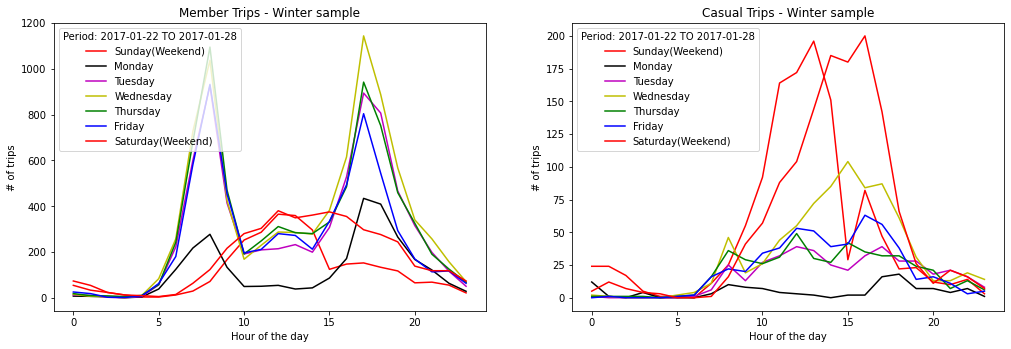

In [15]:
plt.subplot(1, 2, 1,position = [1,1,1,1],title = 'Member Trips - Winter sample')
weekplot(G2M,22,28)

plt.subplot(1, 2, 2,position = [2.2,1,1,1],title = 'Casual Trips - Winter sample')
weekplot(G2C,22,28)


<b>Spring season</b>:

We see both plots for members(left) and casuals(right)

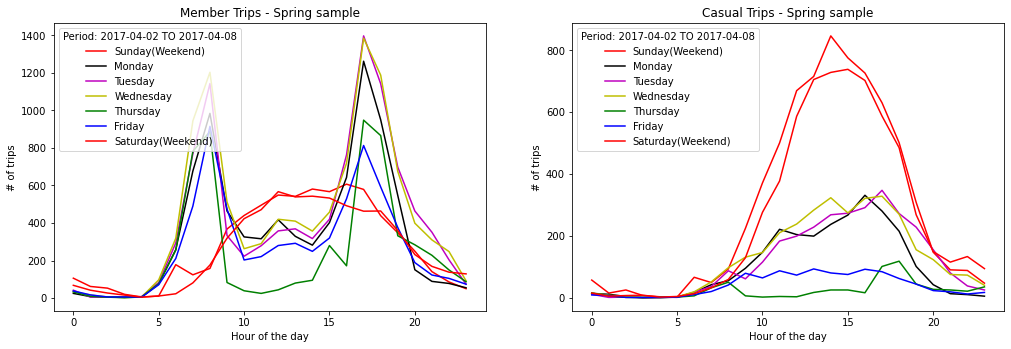

In [16]:
plt.subplot(1, 2, 1,position = [1,1,1,1],title = 'Member Trips - Spring sample')
weekplot(G2M,92,98)

plt.subplot(1, 2, 2,position = [2.2,1,1,1],title = 'Casual Trips - Spring sample')
weekplot(G2C,92,98)

<b>Summer season</b>:

We see both plots for members(left) and casuals(right)

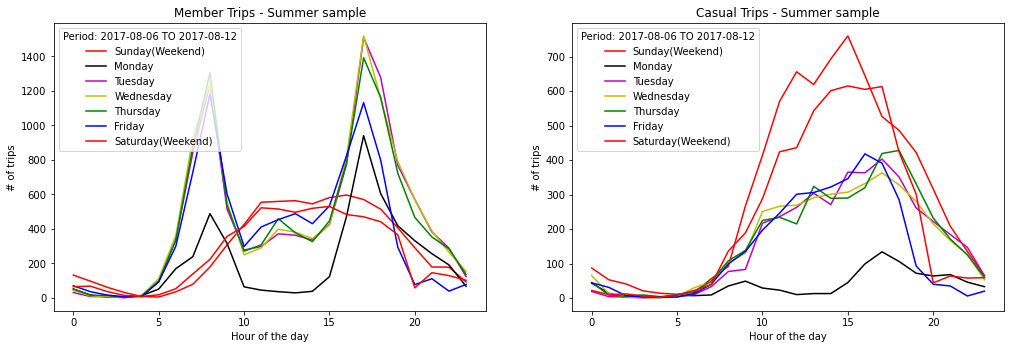

In [17]:
plt.subplot(1, 2, 1,position = [1,1,1,1],title = 'Member Trips - Summer sample')
weekplot(G2M,218,224)

plt.subplot(1, 2, 2,position = [2.2,1,1,1],title = 'Casual Trips - Summer sample')
weekplot(G2C,218,224)

#### Analysis

#### Members group: 

We can see that there are clear pattern for the members group as we observe two peaks on almost 7:00 AM and 5:00 PM  which could be explained by the start & end of the working hours. This pattern stops in the weekend which is shown by red color. Summer & Winter have similar pattern peaking reach 1300 & 1500 while in the winter the useage of the bike is less peaking at 1100 - 1200.



#### Casual group:

We observed that bike rentals from casual group happens mostly between 10:00 AM untill 4:00 PM & they peak in the weekend. Also, in the winter the number of rentals decreases dramatically compared to the numbers in summer & spring(700 ~ 800) but in the winter the peak reachs only 200.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

When investigating the member_type variable, we observed that the average duration is differs a lot if the trip is done by a member or a casual user. Approximatley, causal users spend 3x times longer on bike rentals than members.


We saw that there is a clear pattern for the members group as we observed two peaks in the daily usage plot on almost 7:00 AM and 5:00 PM which could be explained by the start & end of the working hours. This pattern stops in the weekend which is shown by red color. Summer & Winter have similar pattern peaking reach 1300 & 1500 while in the winter the useage of the bike is less peaking at 1100 - 1200. Also, we observed that bike rentals from casual group happens mostly between 10:00 AM untill 4:00 PM & they peak in the weekend. Also, in the winter the number of rentals decreases dramatically compared to the numbers in summer & spring(700 ~ 800) but in the winter the peak reachs only 200.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes, day_hour feature was introduced and we found that the number of rentals at a certain hour of a day has an intresting pattern.


## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the start_station, member_type, duration and month of the year are related

#### Below, I try to first add a column that shows the month on which the trip happend. Then we group records by the month and start_station columns to find the number of trips per month per station:

In [18]:
df_monthly = df
df_monthly['Month'] = df['Day_hour'].dt.strftime('%m')
df_monthly = df_monthly.drop(columns=['Duration','Start_date','End_date','Bike_number','Day_hour'])
G1_monthly = df_monthly.groupby(['Month','Member_type','Start_station']).size().reset_index(name='Monthly_counts')
G1_monthly_C = G1_monthly.loc[G1_monthly['Member_type']=='Casual']
G1_monthly_M = G1_monthly.loc[G1_monthly['Member_type']=='Member']
idx_M = G1_monthly_M.groupby('Month')['Monthly_counts'].idxmax()
idx_C = G1_monthly_C.groupby(['Month'])['Monthly_counts'].idxmax()


In [54]:
G1_monthly_C.loc[idx_C]

,Month,Member_type,Start_station,Monthly_counts
259,01,Casual,Lincoln Memorial,874
1102,02,Casual,Lincoln Memorial,2379
1957,03,Casual,Jefferson Dr & 14th St SW,3002
2847,04,Casual,Jefferson Dr & 14th St SW,6606
3781,05,Casual,Lincoln Memorial,5170
4685,06,Casual,Jefferson Dr & 14th St SW,6314
5648,07,Casual,Lincoln Memorial,7572
6589,08,Casual,Lincoln Memorial,6926
7540,09,Casual,Lincoln Memorial,5533
8502,10,Casual,Lincoln Memorial,5008


In [50]:
G1_monthly_M.loc[idx_M]

,Month,Member_type,Start_station,Monthly_counts
588,01,Member,Columbus Circle / Union Station,3668
1450,02,Member,Columbus Circle / Union Station,4357
2329,03,Member,Columbus Circle / Union Station,4556
3233,04,Member,Columbus Circle / Union Station,5054
4150,05,Member,Columbus Circle / Union Station,5170
5084,06,Member,Columbus Circle / Union Station,5634
6024,07,Member,Columbus Circle / Union Station,5143
6967,08,Member,Columbus Circle / Union Station,5743
7923,09,Member,Columbus Circle / Union Station,5797
8889,10,Member,Columbus Circle / Union Station,6430


#### Interpretation

   The busiest station in each month in <b>member</b> group is always **Columbus Circle / Union Station**. This can be explained by the fact that most of the members used to rent the bike for their usual hapit on a regular basis. It could be daily work of weekly transportation like going back home. 
   
   While in the <b>Casual</b>  Group the busiest stations are Lincoln Memorial & Jefferson Dr & 14th St SW that are located in close to museums and Tourist destinations. This is can be understandable that the casual group used this as a new experince or in their temproary trips & hang-out
   

#### Now, we move to another analysis. Here we want to introduce our second dataset which contains the weather conditions to see how  different weather condition variables affect the number  of  trips in a day or hour

First, lets merge the weather conditons data with the number of bike rentals from the first data set.

In [19]:
myDF = df_weather.drop(['Wind','Date','Time'],axis=1)
myDF['Day_hour'] = myDF['DateTime'].dt.floor(freq = 'H')
myDF = myDF.drop(['DateTime'],axis=1)
Hourly_Count = df.groupby(['Day_hour']).size().reset_index(name='bike_rental_counts')
full_df = pd.merge(myDF, Hourly_Count, on='Day_hour',how='left')

In [85]:
full_df.head()

,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Precip.,Condition,Day_hour,bike_rental_counts
0,46,22,39,9,0,29.97,0.0,Mostly Cloudy,2017-01-01 00:00:00,77.0
1,44,22,42,9,0,29.98,0.0,Partly Cloudy,2017-01-01 01:00:00,80.0
2,43,23,45,13,0,30.00,0.0,Partly Cloudy,2017-01-01 02:00:00,62.0
3,41,23,49,5,0,30.02,0.0,Partly Cloudy,2017-01-01 03:00:00,18.0
4,40,23,51,5,0,30.04,0.0,Partly Cloudy,2017-01-01 04:00:00,5.0


#### In the following box-plot, we see the relation between member_type, weather condition and number of rentals

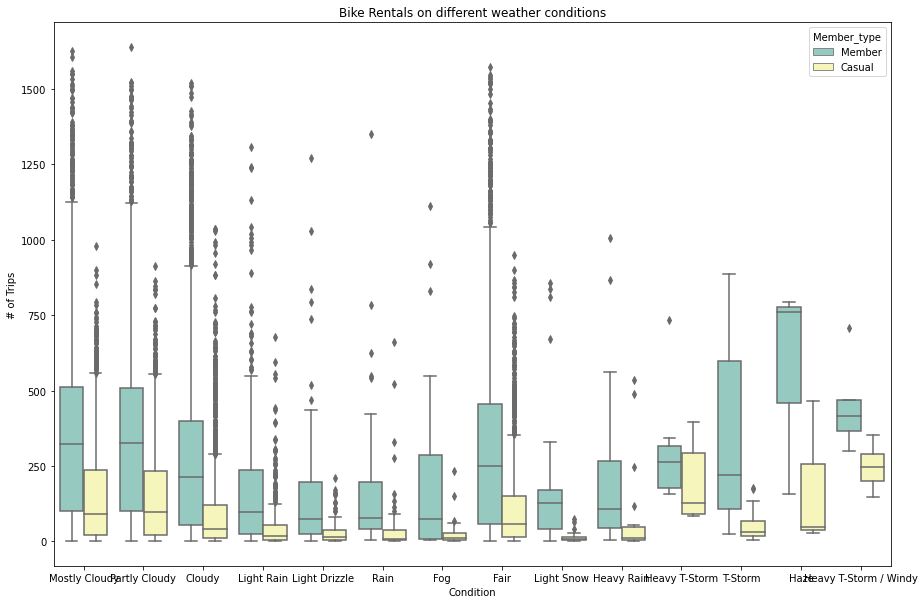

In [20]:
Condition_Count= pd.merge(myDF[['Condition','Day_hour']], G1.rename(columns={'counts':'# of Trips'}), on='Day_hour',how='left')
Part1=Condition_Count.loc[Condition_Count['Condition'].isin(['Mostly Cloudy', 'Partly Cloudy', 'Cloudy', 'Light Rain',
       'Light Drizzle', 'Rain', 'Fog', 'Heavy Rain', 'Fair', 'Mist',
       'Light Snow', 'T-Storm',
       'Haze','Heavy T-Storm / Windy','Snow', 'Heavy Snow','Heavy T-Storm'])]

Part1_M= Part1.loc[Part1['Member_type']=='Member'].drop_duplicates(subset=['Day_hour'])
Part1_C= Part1.loc[Part1['Member_type']=='Casual'].drop_duplicates(subset=['Day_hour'])
Part12 = pd.concat([Part1_M,Part1_C])

plt.figure(figsize=(15,10));
plt.title('Bike Rentals on different weather conditions');
sb.boxplot(hue="Member_type", y="# of Trips", x="Condition",data=Part12, palette="Set3");


Analysis

from the box plot shown above we can see how the weather condition will affect the number of hourly rent.
For example, when there's snow the the number of casual decreases dramatically. 
The highest medians will be when the condition are : 
    Haze, Light Cloudy, Partly Cloudy, fair, and T-storm.

We may say that not all of the conditions will have the same effect on both casual & member.
The one that increases the rental number of member will not necessarily increase the casual.

#### Plotting the Temprature, rental_counts and weather condition

We notice that in Light Snow weather, temperature is obviously lower and the rentals are often less than other conditions.

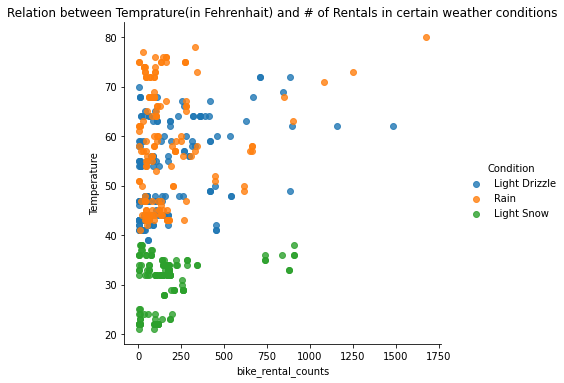

In [72]:

sb.lmplot(x='bike_rental_counts', y='Temperature', hue='Condition', data=full_df[full_df.Condition.isin(['Light Snow', 'Light Drizzle', 'Rain'])], fit_reg=False);
ax = plt.gca();
ax.set_title('Relation between Temprature(in Fehrenhait) and # of Rentals in certain weather conditions');

#### Plotting the Wind speed, rental_counts and weather condition

We notice that in Fog conditions, we observe the lowest wind speeds. Also, in Rain conditions, we notice that bike rentals is significantly lower than the other two situations.

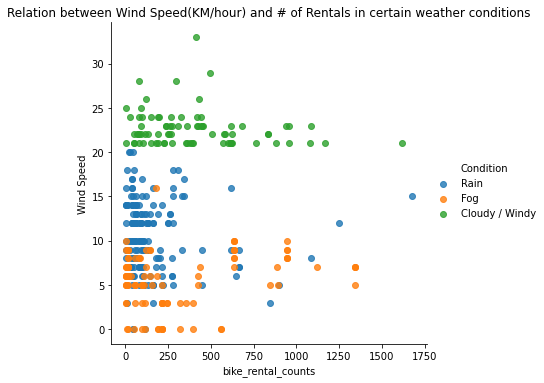

In [73]:

sb.lmplot(x='bike_rental_counts', y='Wind Speed', hue='Condition', data=full_df[full_df.Condition.isin(['Fog', 'Rain', 'Cloudy / Windy'])], fit_reg=False);
ax = plt.gca();
ax.set_title('Relation between Wind Speed(KM/hour) and # of Rentals in certain weather conditions');


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

   The busiest station in each month in <b>member</b> group is always **Columbus Circle / Union Station**. This can be explained by the fact that most of the members used to rent the bike for their usual hapit on a regular basis. It could be daily work of weekly transportation like going back home. 
   
   While in the <b>Casual</b>  Group the busiest stations are Lincoln Memorial & Jefferson Dr & 14th St SW that are located in close to museums and Tourist destinations. This is can be understandable that the casual group used this as a new experince or in their temproary trips & hang-out

### Were there any interesting or surprising interactions between features?

We observed that the members goup is consistent when it comes to the highest number of trips per starting station. We had the same station as highest number of trips for all months of the year. On the other hand, for casuals group we see an uncosistent pattern. Different stations showed up as highest.